# Predicting Fashion Accessories

## Data

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

 

## Preparing Tools and Loading Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualizing the Data

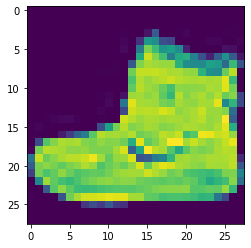

In [7]:
plt.imshow(X_train[0]);

In [8]:
y_train[0]

9

## Preprocessing the Data

**Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
X_train.min(), X_train.max()

(0, 255)

In [17]:
X_train[0][15:]

array([[  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 4

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

In [21]:
X_train[0][15:]

array([[0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24313725,
        0.56862745, 0.8       , 0.89411765, 0.81176471, 0.83529412,
        0.86666667, 0.85490196, 0.81568627, 0.82745098, 0.85490196,
        0.87843137, 0.8745098 , 0.85882353, 0.84313725, 0.87843137,
        0.95686275, 0.62352941, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.07058824,
        0.17254902, 0.32156863, 0.41960784, 0.74117647, 0.89411765,
        0.8627451 , 0.87058824, 0.85098039, 0.88627451, 0.78431373,
        0.80392157, 0.82745098, 0.90196078, 0.87843137, 0.91764706,
        0.69019608, 0.7372549 , 0.98039216, 0.97254902, 0.91372549,
        0.93333333, 0.84313725, 0.        ],
       [0.        , 0.22352941, 0.73333333, 0.81568627, 0.87843137,
        0.86666667, 0.87843137, 0.81568627, 0.8       , 0.83921569,
        0.81568627, 0.81960784, 0.78431373, 0.62352941, 0.96078431,
        0.75686275, 0.8078

In [22]:
X_train.min(), X_train.max()

(0.0, 1.0)

**Reshaping the X arrays to include a 4 dimension of the single channel.**

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [60]:
X_train.shape

(60000, 28, 28, 1)

In [61]:
X_test.shape

(10000, 28, 28, 1)

**Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [32]:
y_cat_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
y_cat_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Modelling

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 padding='valid',
                 strides=(1,1),
                 input_shape=(28, 28, 1),
                 activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


**Train/Fit the model to the x_train set.**

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=1)

In [80]:
model.fit(X_train,
          y_cat_train,
          epochs=10,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4112 - accuracy: 0.8543 - val_loss: 0.3301 - val_accuracy: 0.8836
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2811 - accuracy: 0.8982 - val_loss: 0.3069 - val_accuracy: 0.8882
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2378 - accuracy: 0.9123 - val_loss: 0.2674 - val_accuracy: 0.9031
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2067 - accuracy: 0.9225 - val_loss: 0.2620 - val_accuracy: 0.9070
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1797 - accuracy: 0.9335 - val_loss: 0.2755 - val_accuracy: 0.9028


## Evaluating the Model

In [81]:
model.metrics_names

['loss', 'accuracy']

In [0]:
metrics = pd.DataFrame(model.history.history)

In [83]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.411163,0.854350,0.330126,0.8836
1,0.281064,0.898200,0.306909,0.8882
2,0.237830,0.912317,0.267445,0.9031
3,0.206718,0.922483,0.262022,0.9070
4,0.179666,0.933533,0.275493,0.9028


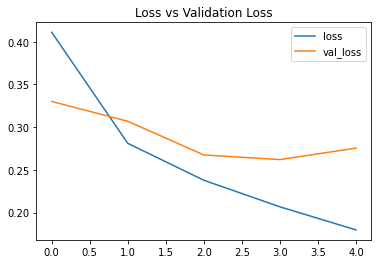

In [84]:
metrics[['loss', 'val_loss']].plot()
plt.title('Loss vs Validation Loss');

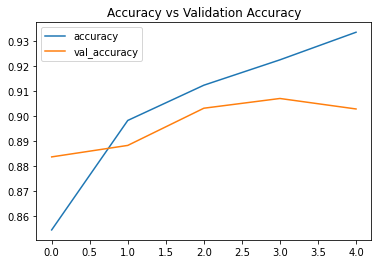

In [85]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy vs Validation Accuracy');

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
predictions = model.predict_classes(X_test)
predictions[:5]

array([9, 2, 1, 1, 6])

In [90]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.75      0.82      1000
           3       0.91      0.92      0.92      1000
           4       0.78      0.91      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.71      0.79      0.75      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [91]:
print(confusion_matrix(y_test, predictions))

[[812   0   8  22   6   0 142   1   9   0]
 [  0 977   0  12   6   1   3   0   1   0]
 [ 16   0 749   7 135   0  92   0   1   0]
 [  3   2   8 924  24   0  36   0   3   0]
 [  0   0  16  30 905   0  48   0   1   0]
 [  0   0   0   0   0 963   0  16   0  21]
 [ 66   0  36  19  79   0 794   0   6   0]
 [  0   0   0   0   0   7   0 945   0  48]
 [  3   0   2   3   4   3   4   3 978   0]
 [  1   0   0   0   0   1   0  17   0 981]]


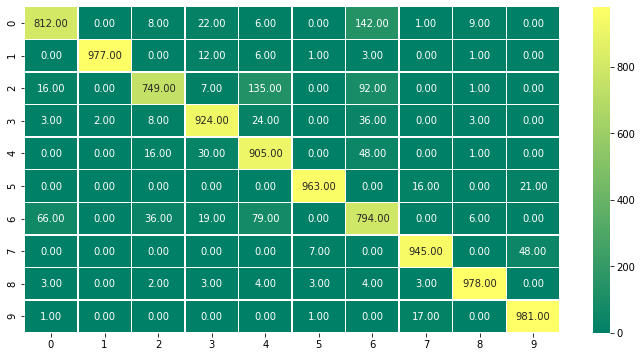

In [96]:
import seaborn as sns

plt.figure(figsize=(12,6))

sns.heatmap(confusion_matrix(y_test, predictions),
                             annot=True,
                             fmt='0.2f',
                             cmap='summer',
                             linewidths=0.5);

## Predicting on New Image

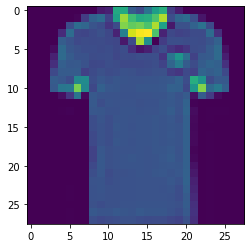

In [104]:
my_image = X_test[59]

plt.imshow(my_image.reshape(28, 28));

In [105]:
model.predict_classes(my_image.reshape(1,28,28,1))

array([0])

In [107]:
y_test[59]

0